In [2]:
import pandas as pd
import pickle 

In [3]:
with open("/Users/aysegul/Documents/GitHub/API_dosya_cekme/data/processed/marketing_data.pkl", "rb") as f:
    df = pickle.load(f)

In [4]:
df

,Channel,Campaign,Impressions,Clicks,Conversions,Spend (USD),Revenue (USD),ROAS,CTR(%),CR(%)
0,Google Ads,Summer_Sale,12000,950,48,300.0,1250.0,4.166667,7.916667,5.052632
1,Facebook,Summer_Sale,10000,720,30,200.0,800.0,4.000000,7.200000,4.166667
2,Instagram,Summer_Sale,8000,500,25,180.0,650.0,3.611111,6.250000,5.000000
3,LinkedIn,B2B_Offer,5000,240,10,150.0,500.0,3.333333,4.800000,4.166667
4,Email,Weekly_Deals,3000,400,35,20.0,450.0,22.500000,13.333333,8.750000
5,Google Ads,Winter_Sale,14000,1100,60,350.0,1600.0,4.571429,7.857143,5.454545
6,Facebook,Winter_Sale,11000,760,32,220.0,900.0,4.090909,6.909091,4.210526
7,Instagram,Winter_Sale,9000,510,24,190.0,700.0,3.684211,5.666667,4.705882
8,YouTube,Video_Ad_1,20000,820,22,400.0,1000.0,2.500000,4.100000,2.682927
9,Twitter,Flash_Deal,6000,300,12,90.0,300.0,3.333333,5.000000,4.000000


In [5]:
df.info()         
df.describe()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Channel        15 non-null     object 
 1   Campaign       15 non-null     object 
 2   Impressions    15 non-null     int64  
 3   Clicks         15 non-null     int64  
 4   Conversions    15 non-null     int64  
 5   Spend (USD)    15 non-null     float64
 6   Revenue (USD)  15 non-null     float64
 7   ROAS           15 non-null     float64
 8   CTR(%)         15 non-null     float64
 9   CR(%)          15 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 1.3+ KB


,Impressions,Clicks,Conversions,Spend (USD),Revenue (USD),ROAS,CTR(%),CR(%)
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,9366.666667,632.666667,30.666667,199.000000,813.333333,6.578767,7.367931,5.023768
std,4650.140807,292.024135,14.636875,115.297751,419.364599,7.371083,2.818413,1.616223
min,2500.000000,240.000000,10.000000,15.000000,300.000000,2.500000,4.100000,2.682927
25%,6500.000000,410.000000,23.000000,140.000000,500.000000,3.647661,5.833333,4.166667
50%,9000.000000,520.000000,28.000000,190.000000,700.000000,3.941176,6.909091,4.761905
75%,11500.000000,790.000000,33.500000,260.000000,950.000000,4.369048,7.886905,5.026316
max,20000.000000,1200.000000,60.000000,400.000000,1700.000000,26.666667,14.000000,8.750000


In [6]:
# New feature
df['net_revenue'] = df['Revenue (USD)'] - df['Spend (USD)']

# Feature (X) and (y)
X = df[['Spend (USD)', 'net_revenue']]
y = df['ROAS']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_pred = model.predict(X_test)

In [12]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: -37.99863217303432
MSE: 12.705315694232718


In [17]:
print(df[['ROAS', 'Spend (USD)', 'Revenue (USD)']].describe())

            ROAS  Spend (USD)  Revenue (USD)
count  15.000000    15.000000      15.000000
mean    6.578767   199.000000     813.333333
std     7.371083   115.297751     419.364599
min     2.500000    15.000000     300.000000
25%     3.647661   140.000000     500.000000
50%     3.941176   190.000000     700.000000
75%     4.369048   260.000000     950.000000
max    26.666667   400.000000    1700.000000


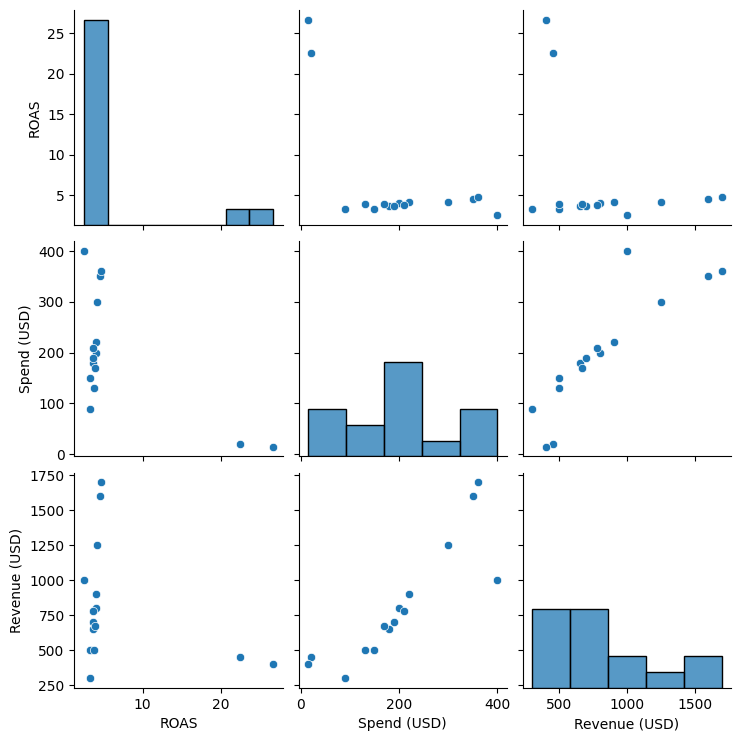

In [18]:
import seaborn as sns  
import matplotlib.pyplot as plt  
sns.pairplot(df[['ROAS', 'Spend (USD)', 'Revenue (USD)']])
plt.show()

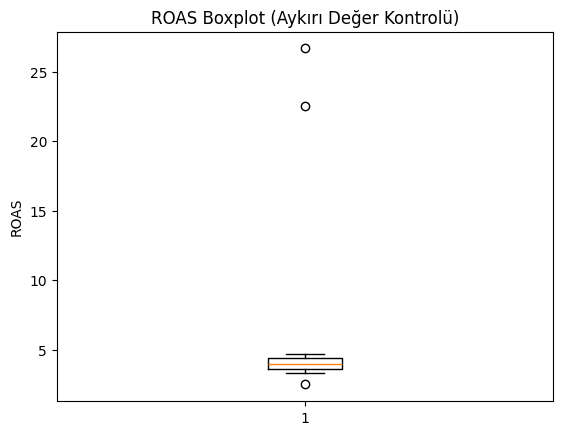

In [23]:
import matplotlib.pyplot as plt

plt.boxplot(df['ROAS'])
plt.title("ROAS Boxplot (Aykırı Değer Kontrolü)")
plt.ylabel("ROAS")
plt.show()

In [24]:
Q1 = df['ROAS'].quantile(0.25)
Q3 = df['ROAS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['ROAS'] >= lower_bound) & (df['ROAS'] <= upper_bound)]

In [25]:
df_clean

,Channel,Campaign,Impressions,Clicks,Conversions,Spend (USD),Revenue (USD),ROAS,CTR(%),CR(%),net_revenue
0,Google Ads,Summer_Sale,12000,950,48,300.0,1250.0,4.166667,7.916667,5.052632,950.0
1,Facebook,Summer_Sale,10000,720,30,200.0,800.0,4.000000,7.200000,4.166667,600.0
2,Instagram,Summer_Sale,8000,500,25,180.0,650.0,3.611111,6.250000,5.000000,470.0
3,LinkedIn,B2B_Offer,5000,240,10,150.0,500.0,3.333333,4.800000,4.166667,350.0
5,Google Ads,Winter_Sale,14000,1100,60,350.0,1600.0,4.571429,7.857143,5.454545,1250.0
6,Facebook,Winter_Sale,11000,760,32,220.0,900.0,4.090909,6.909091,4.210526,680.0
7,Instagram,Winter_Sale,9000,510,24,190.0,700.0,3.684211,5.666667,4.705882,510.0
9,Twitter,Flash_Deal,6000,300,12,90.0,300.0,3.333333,5.000000,4.000000,210.0
10,TikTok,Product_Launch,7000,420,20,130.0,500.0,3.846154,6.000000,4.761905,370.0
11,Google Ads,Product_Launch,15000,1200,58,360.0,1700.0,4.722222,8.000000,4.833333,1340.0


In [26]:
X_clean = df_clean[['Spend (USD)', 'net_revenue']]
y_clean = df_clean['ROAS']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [28]:
model_clean = LinearRegression()
model_clean.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
y_pred_clean = model_clean.predict(X_test)
r2_clean = r2_score(y_test, y_pred_clean)
print(f"Temiz veriyle R2 Skoru: {r2_clean:.2f}")

Temiz veriyle R2 Skoru: 0.93


In [30]:
import numpy as np
spend_range = np.linspace(0, df_clean['Spend (USD)'].max(), 100)

In [37]:
X_pred_range = pd.DataFrame({
    'Spend (USD)': spend_range,
    'net_revenue': df_clean['net_revenue'].mean()  # sabit kalsın
})

In [38]:
X_pred_range

,Spend (USD),net_revenue
0,0.000000,650.0
1,3.636364,650.0
2,7.272727,650.0
3,10.909091,650.0
4,14.545455,650.0
...,...,...
95,345.454545,650.0
96,349.090909,650.0
97,352.727273,650.0
98,356.363636,650.0


In [34]:
y_pred_range = model.predict(X_pred_range)

In [35]:
y_pred_range

array([13.18312489, 13.06900685, 12.95488882, 12.84077078, 12.72665274,
       12.61253471, 12.49841667, 12.38429864, 12.2701806 , 12.15606257,
       12.04194453, 11.92782649, 11.81370846, 11.69959042, 11.58547239,
       11.47135435, 11.35723632, 11.24311828, 11.12900024, 11.01488221,
       10.90076417, 10.78664614, 10.6725281 , 10.55841007, 10.44429203,
       10.33017399, 10.21605596, 10.10193792,  9.98781989,  9.87370185,
        9.75958381,  9.64546578,  9.53134774,  9.41722971,  9.30311167,
        9.18899364,  9.0748756 ,  8.96075756,  8.84663953,  8.73252149,
        8.61840346,  8.50428542,  8.39016739,  8.27604935,  8.16193131,
        8.04781328,  7.93369524,  7.81957721,  7.70545917,  7.59134114,
        7.4772231 ,  7.36310506,  7.24898703,  7.13486899,  7.02075096,
        6.90663292,  6.79251488,  6.67839685,  6.56427881,  6.45016078,
        6.33604274,  6.22192471,  6.10780667,  5.99368863,  5.8795706 ,
        5.76545256,  5.65133453,  5.53721649,  5.42309846,  5.30

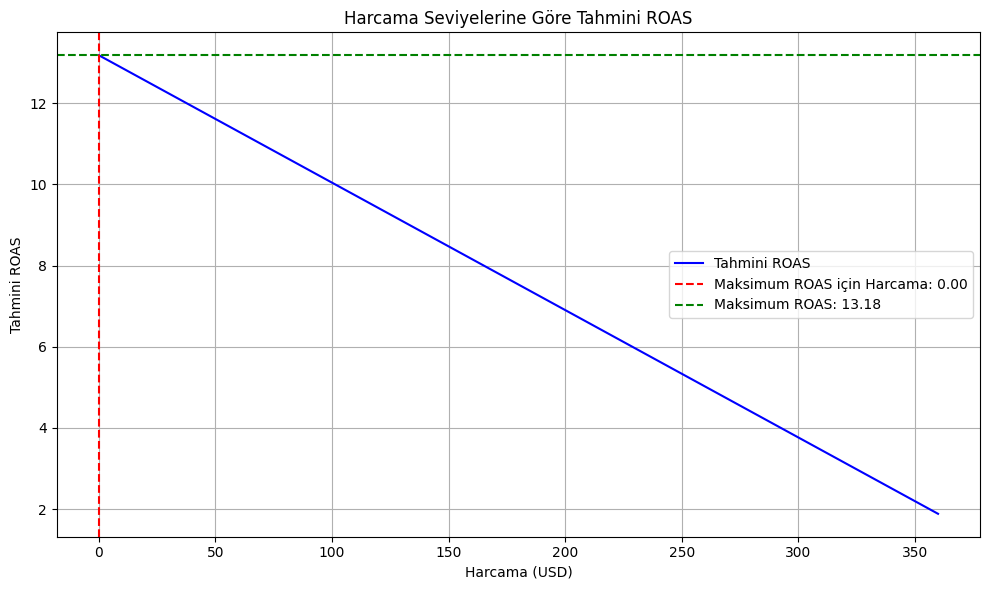

In [36]:
import matplotlib.pyplot as plt

# En yüksek ROAS'ı ve karşılık gelen harcamayı bul
max_roas = y_pred_range.max()
optimal_spend = spend_range[y_pred_range.argmax()]

# Grafik
plt.figure(figsize=(10, 6))
plt.plot(spend_range, y_pred_range, label='Tahmini ROAS', color='blue')
plt.axvline(x=optimal_spend, color='red', linestyle='--', label=f'Maksimum ROAS için Harcama: {optimal_spend:.2f}')
plt.axhline(y=max_roas, color='green', linestyle='--', label=f'Maksimum ROAS: {max_roas:.2f}')
plt.xlabel('Harcama (USD)')
plt.ylabel('Tahmini ROAS')
plt.title('Harcama Seviyelerine Göre Tahmini ROAS')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()